In [26]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from helpers.dicts import traffic_light

In [27]:
with open("input/biomasse.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data["Data"])

### Clean

In [36]:
# Remove punctuation to have kg in integer
df['BIOMASSE_KG'] = df['BIOMASSE_KG'].astype(str).str.replace('[^\d]', '', regex=True).astype(int)
df['UTTAK_KG'] = df['UTTAK_KG'].astype(str).str.replace('[^\d]', '', regex=True).astype(int)
# CHECK IF THIS MATCHES THE RIGHT AMOUNT!

# Add traffic light column
df['TRAFFIC_LIGHT'] = df['PO_KODE'].map(lambda x: traffic_light.get(x, {}).get('light'))

# Remove 2024
clean_df = df[df["ÅR"] != 2024]

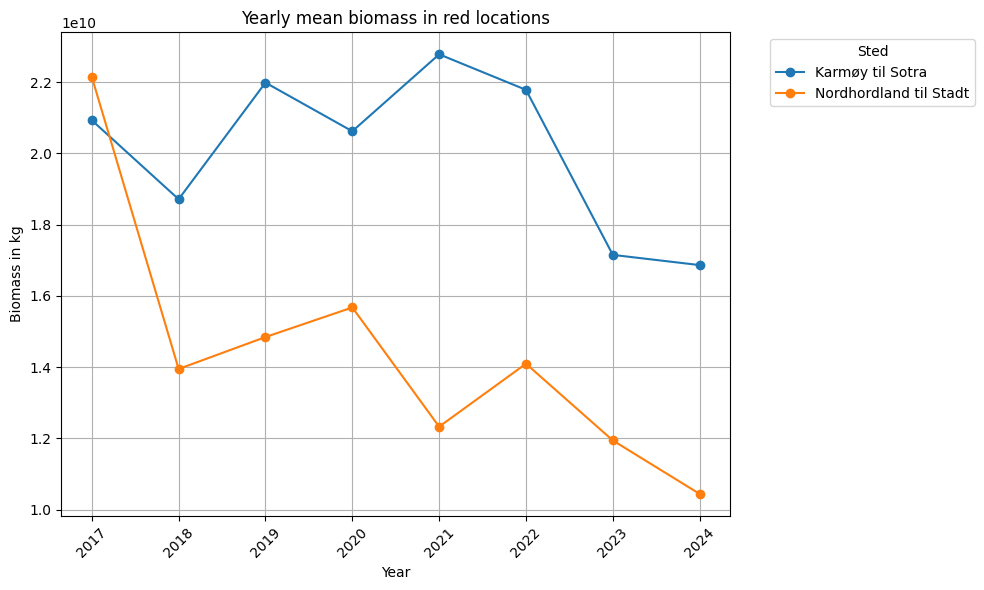

In [32]:
# Color of area
color = "red"

color_df = df[df["TRAFFIC_LIGHT"] == color]
grouped_df = color_df[['ÅR', 'BIOMASSE_KG', 'PO_NAVN']].groupby(['ÅR', 'PO_NAVN']).mean().reset_index()
pivot_df = grouped_df.pivot_table(index=['ÅR'], columns='PO_NAVN', values='BIOMASSE_KG')
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title(f'Yearly mean biomass in {color} locations')
plt.xlabel('Year')
plt.ylabel('Biomass in kg')
plt.grid(True)
plt.legend(title='Sted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
